<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-preprocessing" data-toc-modified-id="Image-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image preprocessing</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#File-ID" data-toc-modified-id="File-ID-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>File ID</a></span></li><li><span><a href="#English_name" data-toc-modified-id="English_name-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>English_name</a></span></li><li><span><a href="#Vocalization_type" data-toc-modified-id="Vocalization_type-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Vocalization_type</a></span></li><li><span><a href="#Quality" data-toc-modified-id="Quality-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Quality</a></span></li></ul></li><li><span><a href="#Total-points" data-toc-modified-id="Total-points-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Total points</a></span></li></ul></div>

In [1]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage import measure, transform
from skimage import color
import seaborn as sns
from datetime import datetime

# Image preprocessing

In [2]:
# pre-process of image
img=mpimg.imread('Lekagul_Roadways_2018.bmp')
img.setflags(write=1)
img = np.flip(img, axis=0)
img[img >=234] = 255
spec_pos = dict()
map_line = np.zeros(img.shape[:2], dtype='int8')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if np.sum(np.equal(img[i,j],[0,0,0,255])) == 4:
            map_line[i,j] = 0
            img[i,j] = [0,0,0,255]
        elif np.sum(img[i,j]==[255,255,255,255]) == 4:
            map_line[i,j] = 1
            img[i,j] = [255,255,255,0]
        else:
            spec_pos[(i,j)] = img[i,j]
            map_line[i,j] = 0
contours = measure.find_contours(map_line, 0.3, fully_connected='high') 

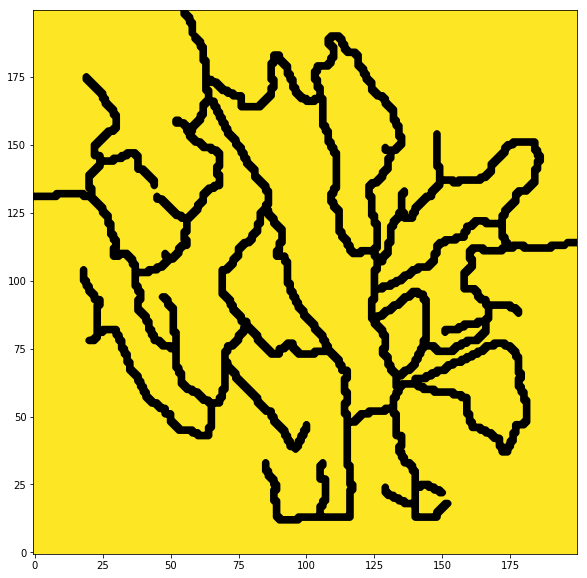

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(map_line, origin='low')
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=6, color='black', zorder=2)

# Data Preprocessing

In [4]:
types = {'File_id':'int',
         'English_name':"category", 
         'Vocalization_type':'category',
        'Quality': 'category'}
sentinels = {'Quality':'no score'}
converters = {'Vocalization_type':lambda x: x.lower().strip()}
all_birds = pd.read_csv('AllBirdsv4.csv',
#                         na_values=sentinels,
                        dtype=types, 
                        converters=converters, 
                        parse_dates=[[5,4]])
all_birds['Vocalization_type'] = all_birds['Vocalization_type'].astype('category')

all_birds.info()
print("\nNumbre of unique values:\n",all_birds.nunique())
all_birds.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 7 columns):
Date_Time            2081 non-null object
File ID              2081 non-null int64
English_name         2081 non-null category
Vocalization_type    2081 non-null category
Quality              2081 non-null category
X                    2081 non-null int64
Y                    2081 non-null int64
dtypes: category(3), int64(3), object(1)
memory usage: 72.5+ KB

Numbre of unique values:
 Date_Time            1808
File ID              2081
English_name           19
Vocalization_type       7
Quality                 6
X                     153
Y                     163
dtype: int64


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: ParserWarning: Both a converter and dtype were specified for column Vocalization_type - only the converter will be used
  # This is added back by InteractiveShellApp.init_path()


Index(['Date_Time', 'File ID', 'English_name', 'Vocalization_type', 'Quality',
       'X', 'Y'],
      dtype='object')

## File ID

In [5]:
file_id = all_birds['File ID']
print("Numbre of row: {} \t Numbre of possible values:{}".format(file_id.count(),file_id.unique().shape))

Numbre of row: 2081 	 Numbre of possible values:(2081,)


So the <code>file_id</code> could traite as a index.

## English_name 

Numbre of row: 2081 	 Numbre of possible values:(19,)


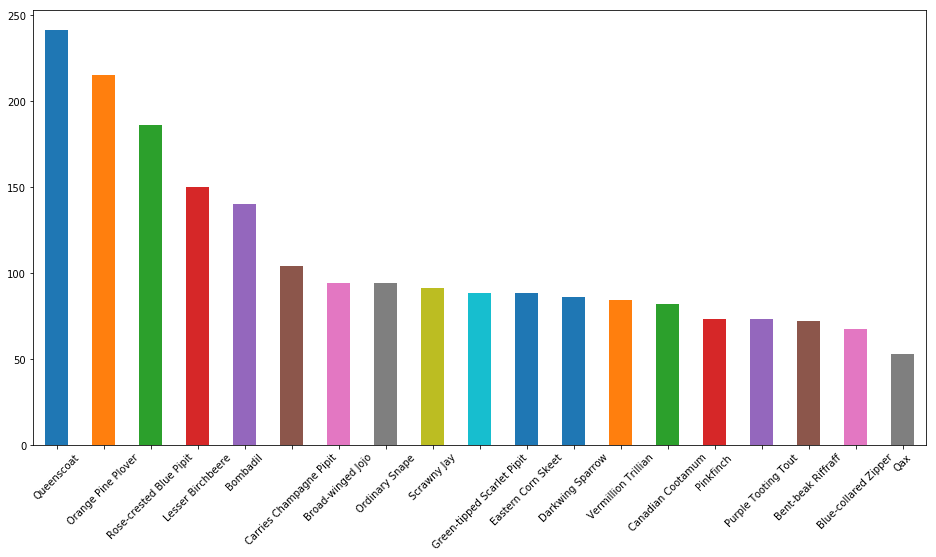

In [6]:
english_name = all_birds['English_name']
print("Numbre of row: {} \t Numbre of possible values:{}".format(english_name.count(),english_name.unique().shape))
fig = plt.subplots(figsize=(16,8))
english_name.value_counts(dropna=False).plot(kind='bar', rot=45)

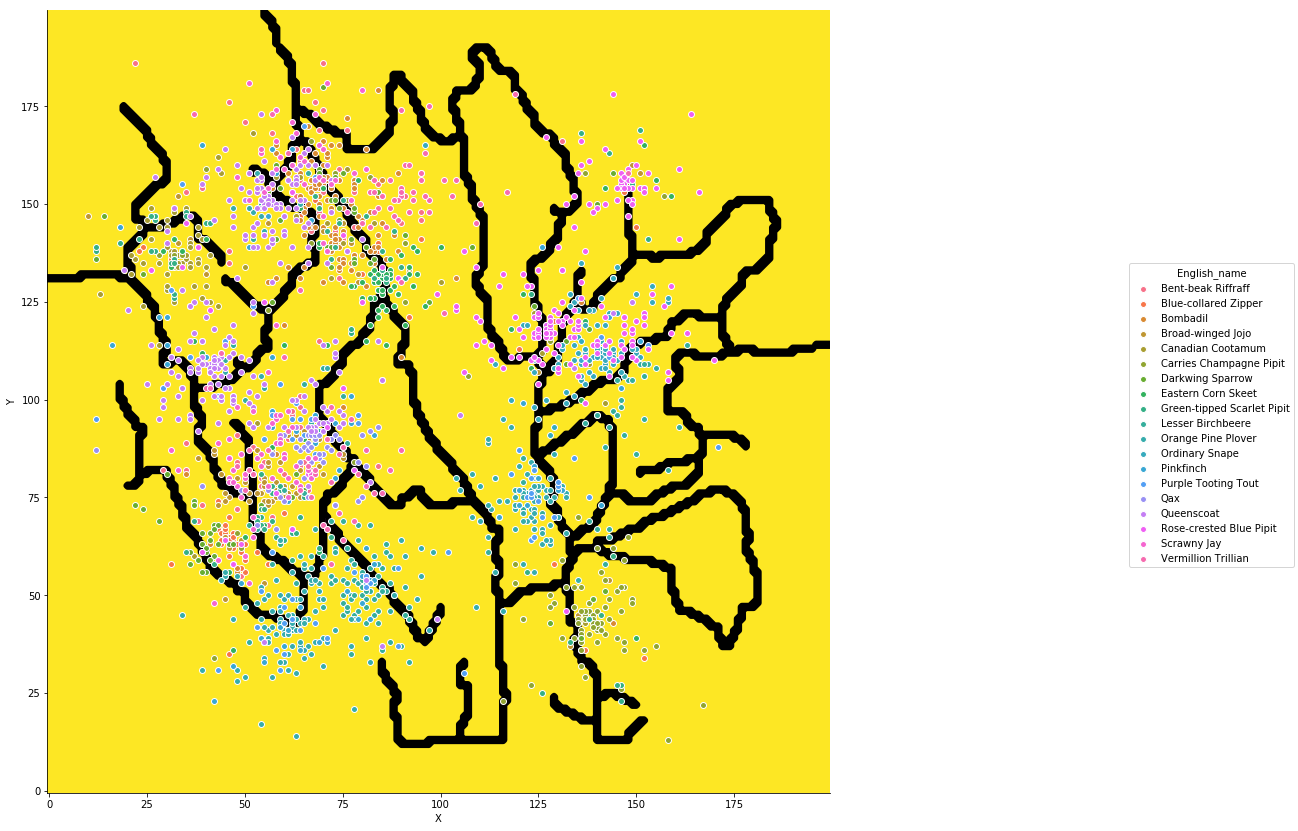

In [7]:
g = sns.pairplot(x_vars=["X"], y_vars=["Y"], data=all_birds, hue="English_name", size=5,plot_kws={'zorder':2})
plt.imshow(map_line, origin='low')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=6, color='black', zorder=1)
g.fig.set_size_inches(20,20)

## Vocalization_type

In [8]:
vocalization_type = all_birds['Vocalization_type']
print("Numbre of row: {} \t Numbre of possible values:{}".format(vocalization_type.count(),vocalization_type.unique().shape))
print(vocalization_type.value_counts(dropna=False))

Numbre of row: 2081 	 Numbre of possible values:(7,)
call             1168
song              767
call, song        112
?                  21
drumming           11
scold               1
bill-snapping       1
Name: Vocalization_type, dtype: int64


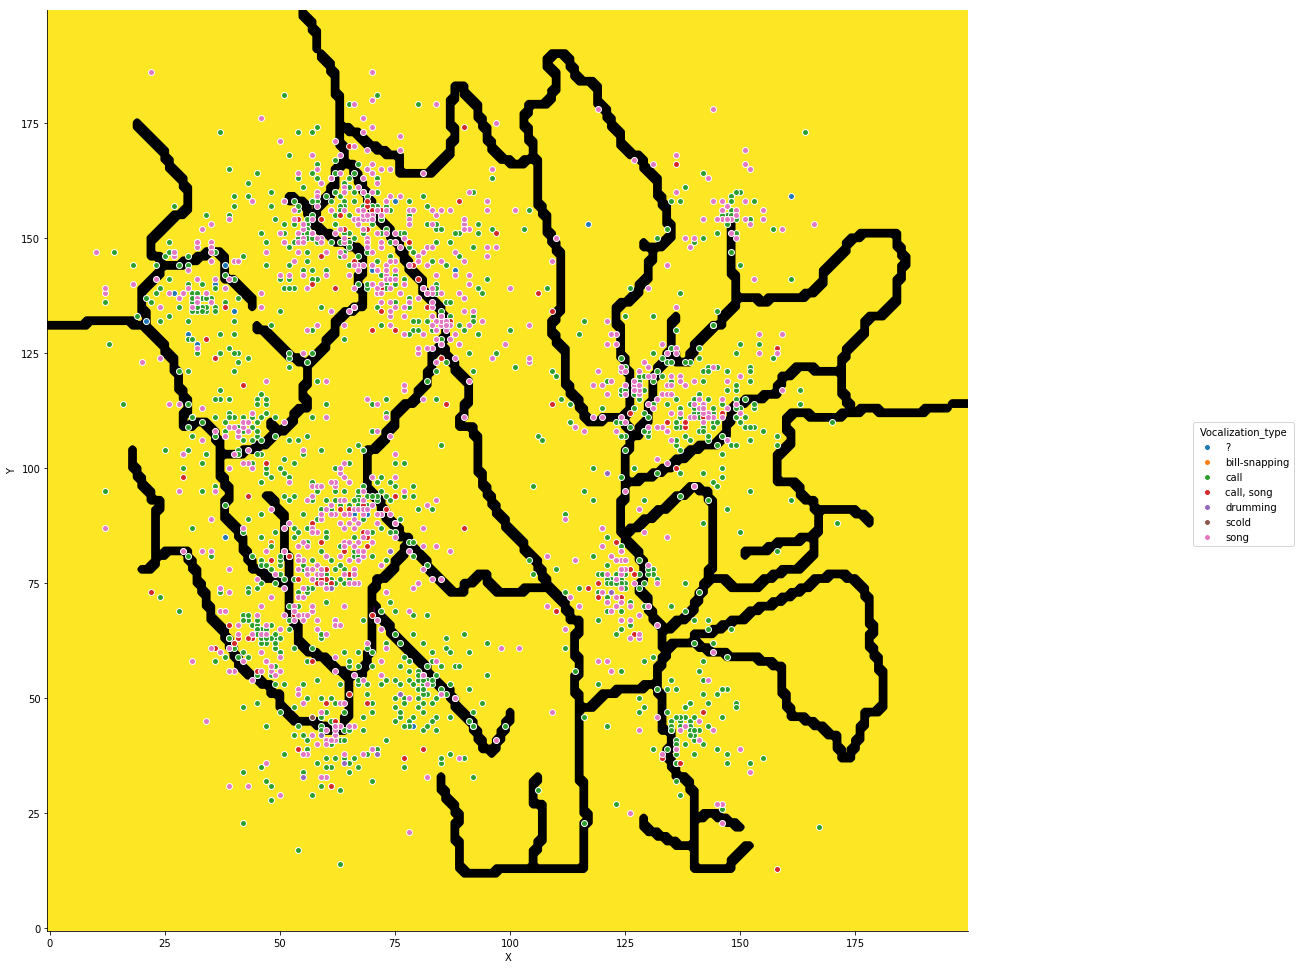

In [9]:
g = sns.pairplot(x_vars=["X"], y_vars=["Y"], data=all_birds, hue="Vocalization_type", size=5,plot_kws={'zorder':2},dropna=False)
plt.imshow(map_line, origin='low')
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=6, color='black', zorder=1)
g.fig.set_size_inches(20,20)

## Quality 

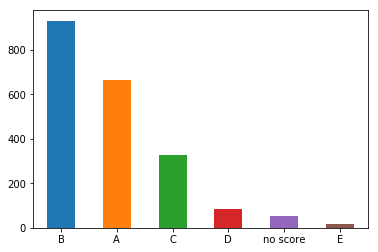

In [10]:
quality = all_birds['Quality']
quality.value_counts(dropna=False).plot(kind='bar', rot=0)

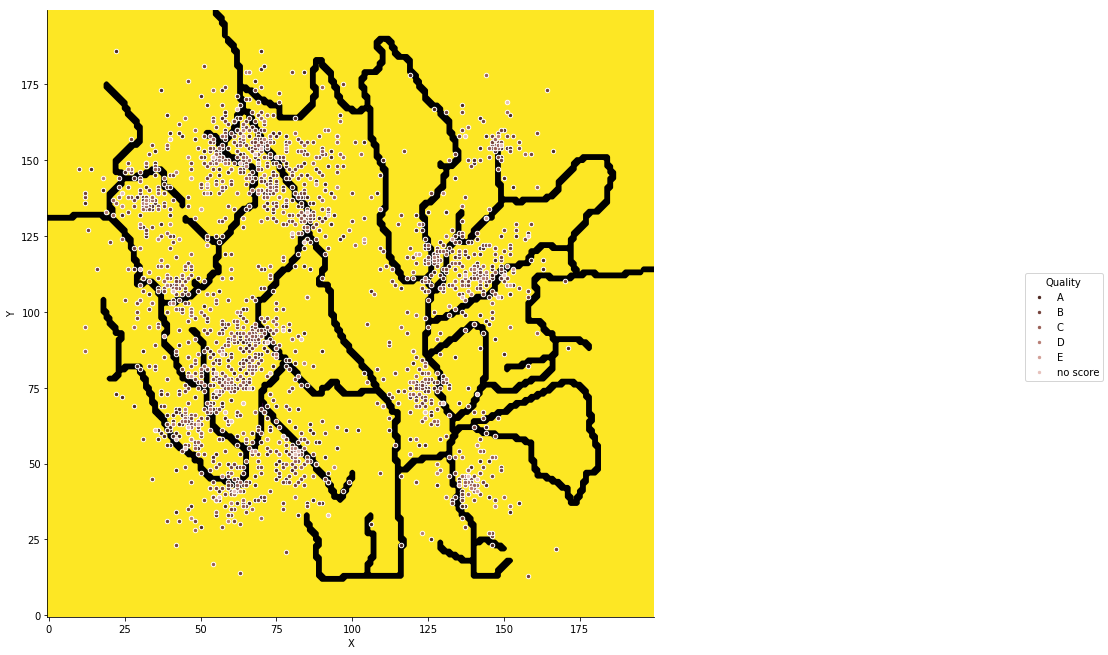

In [11]:
g = sns.pairplot(
    x_vars=["X"],
    y_vars=["Y"],
    palette=sns.cubehelix_palette(
        6, start=4, rot=0, dark=0.2, light=0.8, reverse=True),
    data=all_birds,
    hue="Quality",
    plot_kws={
        'zorder': 2,
        's': 20
    },
    dropna=False)
plt.imshow(map_line, origin='low')
for n, contour in enumerate(contours):
    plt.plot(
        contour[:, 1], contour[:, 0], linewidth=4, color='black', zorder=1)
g.fig.set_size_inches(20, 20)

In [31]:
all_birds['Date_Time'] =pd.to_datetime(all_birds['Date_Time'])
groupes = all_birds.groupby(all_birds['Date_Time'])
for groupe in groups:
    group.plot(kind="scatter", x='X', y='Y')

ValueError: ('Unknown string format:', '10/8/2016 ?')

# Total points

NameError: name 'pos' is not defined

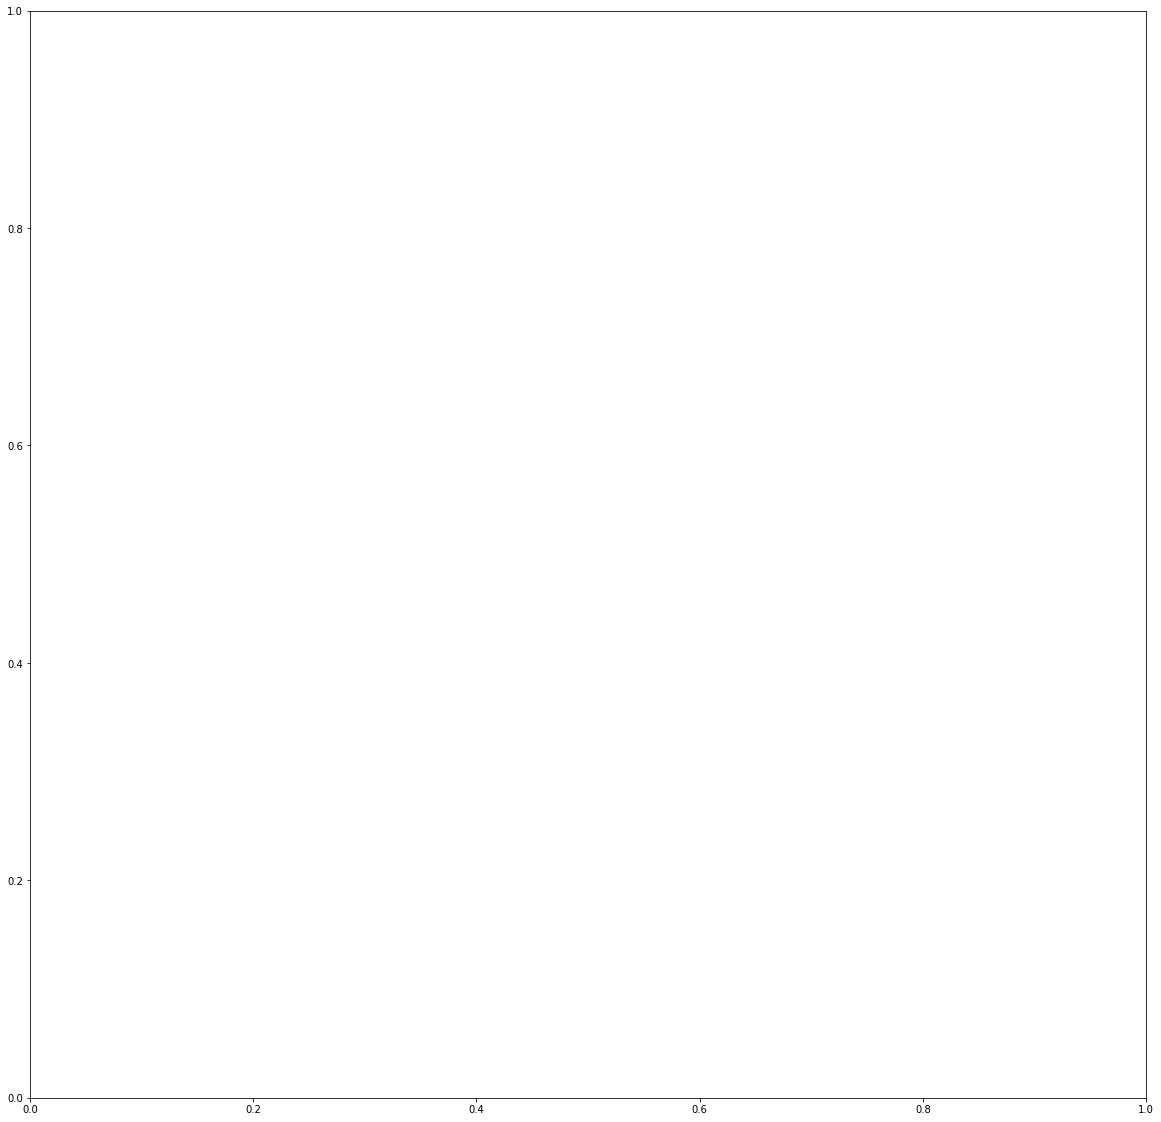

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
contours = measure.find_contours(map_line, 0.4,fully_connected='high') 

ax.scatter(pos[:,1],  pos[:,0], s=50,c=c/255, zorder=3)
ax.imshow(img,cmap=plt.cm.gray,zorder=0, origin=(0,0))
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=6, color='black', zorder=2)

# ax.scatter(X_test,y_test, s=100, c='r')
# ax.scatter(X_all,y_all, s=50)


ax1 = all_birds.plot(kind='scatter', x='X', y='Y', color='r', ax=ax)    
ax2 = test_birds.plot(kind='scatter', x='X', y='Y', color='g', ax=ax, s=100)    

# plt.xlabel('x label', fontsize=14)
# plt.ylabel('y label', fontsize=14)
# ax.set_xlim(0, 255)
# ax.set_ylim(0, 255)
# plt.show()

